In [3]:
pip install geopandas


   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   --- ------------------------------------ 1.8/19.2 MB 9.1 MB/s eta 0:00:02
   -------- ------------------------------- 3.9/19.2 MB 9.4 MB/s eta 0:00:02
   ------------ --------------------------- 5.8/19.2 MB 9.5 MB/s eta 0:00:02
   ---------------- ----------------------- 7.9/19.2 MB 9.7 MB/s eta 0:00:02
   --------------------- ------------------ 10.2/19.2 MB 10.0 MB/s eta 0:00:01
   ------------------------- -------------- 12.3/19.2 MB 10.0 MB/s eta 0:00:01
   ------------------------------ --------- 14.7/19.2 MB 10.1 MB/s eta 0:00:01
   ----------------------------------- ---- 17.0/19.2 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 7.9 MB/s et

In [1]:
pip install folium

  Using cached folium-0.19.7-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
Using cached folium-0.19.7-py2.py3-none-any.whl (112 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install dbfread

Note: you may need to restart the kernel to use updated packages.


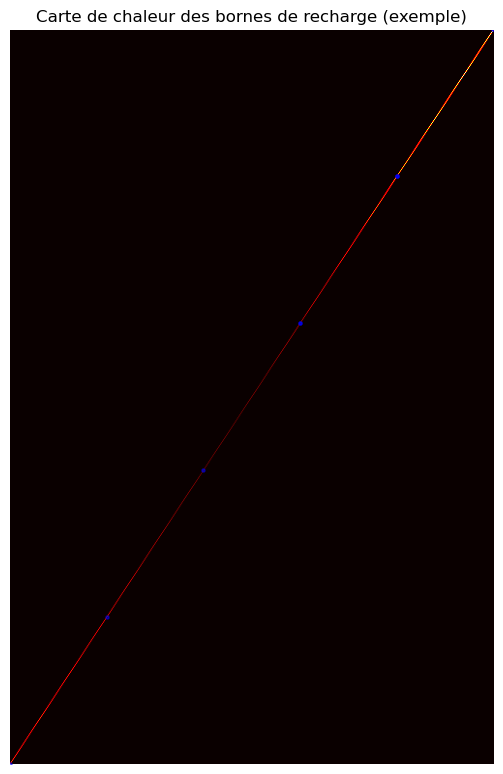

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Chargement du fichier PNG ne sert pas ici, on attend le CSV ou GeoJSON
# Pour la démonstration, créons un mini DataFrame simulant des coordonnées GPS de bornes
data = {
    'id': range(10),
    'latitude': [48.8566, 48.8666, 48.8466, 48.8366, 48.8266, 48.8166, 48.8566, 48.8666, 48.8466, 48.8566],
    'longitude': [2.3522, 2.3622, 2.3422, 2.3322, 2.3222, 2.3122, 2.3522, 2.3622, 2.3422, 2.3522]
}

df = pd.DataFrame(data)

# Création d'une GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Conversion vers une projection métrique pour permettre l'estimation de densité
gdf_proj = gdf.to_crs(epsg=3857)

# Création d'une carte de chaleur par Kernel Density Estimation (KDE)
from scipy.stats import gaussian_kde
import numpy as np

x = gdf_proj.geometry.x
y = gdf_proj.geometry.y
xy = np.vstack([x, y])
kde = gaussian_kde(xy)

# Création d'une grille pour évaluer la densité
xmin, ymin, xmax, ymax = gdf_proj.total_bounds
xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
positions = np.vstack([xx.ravel(), yy.ravel()])
density = kde(positions).reshape(xx.shape)

# Affichage de la carte de chaleur
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(np.rot90(density), cmap=plt.cm.hot, extent=[xmin, xmax, ymin, ymax])
gdf_proj.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
ax.set_title("Carte de chaleur des bornes de recharge (exemple)")
plt.axis("off")
plt.tight_layout()
plt.show()


In [6]:
df_first = pd.read_csv("C:/Code/Projets_perso/projets/GeoChargeAnalytics/data/raw/1-irve-statique.csv")

In [7]:
df_first.head()

,contact_amenageur,contact_operateur,nom_amenageur,nom_operateur,telephone_operateur,siren_amenageur,raccordement,nom_enseigne,id_station_itinerance,id_station_local,...,reservation,horaires,accessibilite_pmr,restriction_gabarit,station_deux_roues,date_mise_en_service,observations,date_maj,cable_t2_attache,num_pdl
0,support@fastned.nl,support@fastned.nl,Fastned France,Fastned France,+(33)-(18)-4710062,853300010.0,Direct,Fastned Aire de Valmy-Orbeval,FRFASE33114,FRFASE33114,...,False,24/7,Accessible mais non réservé PMR,Hauteur maximale 3m,False,2022-12-13,NaN,2025-06-05,False,NaN
1,support@fastned.nl,support@fastned.nl,Fastned France,Fastned France,+(33)-(18)-4710062,853300010.0,Direct,Fastned Aire de Valmy-Orbeval,FRFASE33114,FRFASE33114,...,False,24/7,Accessible mais non réservé PMR,Hauteur maximale 3m,False,2022-12-13,NaN,2025-06-05,True,NaN
2,support@fastned.nl,support@fastned.nl,Fastned France,Fastned France,+(33)-(18)-4710062,853300010.0,Direct,Fastned Aire de Valmy-Orbeval,FRFASE33114,FRFASE33114,...,False,24/7,Accessible mais non réservé PMR,Hauteur maximale 3m,False,2022-12-13,NaN,2025-06-05,False,NaN
3,support@fastned.nl,support@fastned.nl,Fastned France,Fastned France,+(33)-(18)-4710062,853300010.0,Direct,Fastned Aire de Valmy-Orbeval,FRFASE33114,FRFASE33114,...,False,24/7,Accessible mais non réservé PMR,Hauteur maximale 3m,False,2022-12-13,NaN,2025-06-05,True,NaN
4,support@fastned.nl,support@fastned.nl,Fastned France,Fastned France,+(33)-(18)-4710062,853300010.0,Direct,Fastned Aire de Jonchets - La Grande Paroisse,FRFASE33021,FRFASE33021,...,False,24/7,Accessible mais non réservé PMR,Hauteur maximale 3m,False,2021-12-27,NaN,2025-06-05,False,NaN


In [8]:
df_first.columns

Index(['contact_amenageur', 'contact_operateur', 'nom_amenageur',
       'nom_operateur', 'telephone_operateur', 'siren_amenageur',
       'raccordement', 'nom_enseigne', 'id_station_itinerance',
       'id_station_local', 'nom_station', 'implantation_station',
       'adresse_station', 'code_insee_commune', 'coordonneesXY', 'nbre_pdc',
       'id_pdc_itinerance', 'id_pdc_local', 'puissance_nominale',
       'prise_type_ef', 'prise_type_2', 'prise_type_combo_ccs',
       'prise_type_chademo', 'prise_type_autre', 'gratuit', 'tarification',
       'paiement_autre', 'paiement_acte', 'paiement_cb', 'condition_acces',
       'reservation', 'horaires', 'accessibilite_pmr', 'restriction_gabarit',
       'station_deux_roues', 'date_mise_en_service', 'observations',
       'date_maj', 'cable_t2_attache', 'num_pdl'],
      dtype='object')

In [5]:
import pandas as pd
df_consolide = pd.read_csv('C:/Code/Projets_perso/projets/GeoChargeAnalytics/data/raw/consolidation-etalab-schema-irve-statique-v-2.3.1-20250608.csv')

C:\Users\musta\AppData\Local\Temp\ipykernel_10776\3311107651.py:2: DtypeWarning: Columns (12,18,19,20,21,22,24,29,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_consolide = pd.read_csv('C:/Code/Projets_perso/projets/GeoChargeAnalytics/data/raw/consolidation-etalab-schema-irve-statique-v-2.3.1-20250608.csv')


In [6]:
df_consolide.shape

(129065, 52)

In [8]:
df_consolide.columns

Index(['nom_amenageur', 'siren_amenageur', 'contact_amenageur',
       'nom_operateur', 'contact_operateur', 'telephone_operateur',
       'nom_enseigne', 'id_station_itinerance', 'id_station_local',
       'nom_station', 'implantation_station', 'adresse_station',
       'code_insee_commune', 'coordonneesXY', 'nbre_pdc', 'id_pdc_itinerance',
       'id_pdc_local', 'puissance_nominale', 'prise_type_ef', 'prise_type_2',
       'prise_type_combo_ccs', 'prise_type_chademo', 'prise_type_autre',
       'gratuit', 'paiement_acte', 'paiement_cb', 'paiement_autre',
       'tarification', 'condition_acces', 'reservation', 'horaires',
       'accessibilite_pmr', 'restriction_gabarit', 'station_deux_roues',
       'raccordement', 'num_pdl', 'date_mise_en_service', 'observations',
       'date_maj', 'cable_t2_attache', 'last_modified', 'datagouv_dataset_id',
       'datagouv_resource_id', 'datagouv_organization_or_owner', 'created_at',
       'consolidated_longitude', 'consolidated_latitude',
     

In [10]:
pd.set_option('display.max_columns', None)
df_consolide.head()

,nom_amenageur,siren_amenageur,contact_amenageur,nom_operateur,contact_operateur,telephone_operateur,nom_enseigne,id_station_itinerance,id_station_local,nom_station,implantation_station,adresse_station,code_insee_commune,coordonneesXY,nbre_pdc,id_pdc_itinerance,id_pdc_local,puissance_nominale,prise_type_ef,prise_type_2,prise_type_combo_ccs,prise_type_chademo,prise_type_autre,gratuit,paiement_acte,paiement_cb,paiement_autre,tarification,condition_acces,reservation,horaires,accessibilite_pmr,restriction_gabarit,station_deux_roues,raccordement,num_pdl,date_mise_en_service,observations,date_maj,cable_t2_attache,last_modified,datagouv_dataset_id,datagouv_resource_id,datagouv_organization_or_owner,created_at,consolidated_longitude,consolidated_latitude,consolidated_code_postal,consolidated_commune,consolidated_is_lon_lat_correct,consolidated_is_code_insee_verified,consolidated_is_code_insee_modified
0,ChargePoint,NaN,info@chargepoint.com,ChargePoint,info@chargepoint.com,NaN,ACU_Poste_De_Garde_Haguenau,ATHTBE1004017,ATHTBE1004017,ACU_Poste_De_Garde_Haguenau,Voirie,"93 route de Bitche, 67506 Haguenau Cedex",NaN,"[7.76269400,48.82561300]",4,ATHTBE1004017,ATHTBE1004017,22.0,False,True,False,False,False,False,True,True,NaN,NaN,Accès réservé,False,24/7,Accessibilité inconnue,inconnu,false,NaN,NaN,2020-07-25,EF connector is available at the site separately,2025-06-07,false,2025-06-08T01:00:15.802000+00:00,64060c2ac773dcf3fabbe5d2,b11113db-875d-41c7-8673-0cf8ad43e917,eco-movement,2023-06-28T11:46:08.539000+00:00,7.762694,48.825613,NaN,NaN,False,False,False
1,ChargePoint,NaN,info@chargepoint.com,ChargePoint,info@chargepoint.com,NaN,ACU_Poste_De_Garde_Haguenau,ATHTBE1004018,ATHTBE1004018,ACU_Poste_De_Garde_Haguenau,Voirie,"93 route de Bitche, 67506 Haguenau Cedex",NaN,"[7.76269400,48.82561300]",4,ATHTBE1004018,ATHTBE1004018,22.0,False,True,False,False,False,False,True,True,NaN,NaN,Accès réservé,False,24/7,Accessibilité inconnue,inconnu,false,NaN,NaN,2020-07-25,EF connector is available at the site separately,2025-06-07,false,2025-06-08T01:00:15.802000+00:00,64060c2ac773dcf3fabbe5d2,b11113db-875d-41c7-8673-0cf8ad43e917,eco-movement,2023-06-28T11:46:08.539000+00:00,7.762694,48.825613,NaN,NaN,False,False,False
2,ChargePoint,NaN,info@chargepoint.com,ChargePoint,info@chargepoint.com,NaN,ACU_Poste_De_Garde_Haguenau,ATHTBE1004019,ATHTBE1004019,ACU_Poste_De_Garde_Haguenau,Voirie,"93 route de Bitche, 67506 Haguenau Cedex",NaN,"[7.76269400,48.82561300]",4,ATHTBE1004019,ATHTBE1004019,11.0,False,True,False,False,False,False,True,True,NaN,NaN,Accès réservé,False,24/7,Accessibilité inconnue,inconnu,false,NaN,NaN,2020-07-25,EF connector is available at the site separately,2025-06-07,false,2025-06-08T01:00:15.802000+00:00,64060c2ac773dcf3fabbe5d2,b11113db-875d-41c7-8673-0cf8ad43e917,eco-movement,2023-06-28T11:46:08.539000+00:00,7.762694,48.825613,NaN,NaN,False,False,False
3,ChargePoint,NaN,info@chargepoint.com,ChargePoint,info@chargepoint.com,NaN,ACU_Poste_De_Garde_Haguenau,ATHTBE1004020,ATHTBE1004020,ACU_Poste_De_Garde_Haguenau,Voirie,"93 route de Bitche, 67506 Haguenau Cedex",NaN,"[7.76269400,48.82561300]",4,ATHTBE1004020,ATHTBE1004020,11.0,False,True,False,False,False,False,True,True,NaN,NaN,Accès réservé,False,24/7,Accessibilité inconnue,inconnu,false,NaN,NaN,2020-07-25,EF connector is available at the site separately,2025-06-07,false,2025-06-08T01:00:15.802000+00:00,64060c2ac773dcf3fabbe5d2,b11113db-875d-41c7-8673-0cf8ad43e917,eco-movement,2023-06-28T11:46:08.539000+00:00,7.762694,48.825613,NaN,NaN,False,False,False
4,ChargePoint,NaN,info@chargepoint.com,ChargePoint,info@chargepoint.com,NaN,HAG_P22_Slave_3,ATHTBE1004957,ATHTBE1004957,HAG_P22_Slave_3,Voirie,"Route de Bitche 93, 67500 Haguenau",NaN,"[7.76184100,48.82704000]",8,ATHTBE1004957,ATHTBE1004957,22.0,False,True,False,False,False,False,True,True,NaN,NaN,Accès réservé,True,24/7,Accessibilité inconnue,inconnu,false,NaN,NaN,2024-04-30,EF connector is available at the site separately,2025-06-07,false,

In [15]:
import pandas as pd
import ast
import re

In [11]:
def extract_ville_code_postal(df: pd.DataFrame) -> pd.DataFrame:
    """Extrait code postal et ville."""
    # Extraction code postal
    df['code_postal'] = df['adresse_station'].str.extract(r'(\d{5})')[0]
    # Extraction ville normalisée (on utilise la nouvelle version robuste)
    df['ville'] = df['adresse_station'].apply(normalize_city_name)
    return df



In [13]:
def normalize_city_name(adresse: str) -> str:
    """Normalise le nom de la ville à partir de l'adresse."""
    if pd.isna(adresse):
        return None
    adresse = adresse.upper()
    # Cas spéciaux Paris/Lyon
    if re.search(r'750\d{2}\s+PARIS', adresse):
        return 'PARIS'
    if re.search(r'690\d{2}\s+LYON', adresse):
        return 'LYON'
    # Supprime les codes d'autoroute
    adresse = re.sub(r'\b(A\d+|RN\d+)\b', '', adresse)
    # Supprime les codes postaux dupliqués
    adresse = re.sub(r'(\d{5})\s+\1', r'\1', adresse)
    # Nettoie les espaces
    adresse = re.sub(r'\s+', ' ', adresse.strip())
    # Extrait code postal + ville (gère apostrophes, tirets, etc.)
    match = re.search(r'.*\b(\d{5})\s+([A-ZÀ-ÿ\'\- ]+)$', adresse)
    if match:
        ville = match.group(2).strip()
        # Normalise les abréviations courantes
        ville = re.sub(r"\bST\b", "SAINT", ville)
        ville = re.sub(r"\bSTE\b", "SAINTE", ville)
        ville = ville.title()
        return ville
    # Si pas de code postal valide, essaie d'extraire le dernier mot/groupe
    else:
        mots = [m.strip() for m in re.split(r'[,\s]+', adresse) if m.strip()]
        if mots:
            ville = mots[-1].upper()
            ville = re.sub(r"\bST\b", "SAINT", ville)
            ville = re.sub(r"\bSTE\b", "SAINTE", ville)
            ville = ville.title()
            return ville
    return None

In [25]:
df_final=extract_ville_code_postal(df_consolide)
df_final.head()

,nom_amenageur,siren_amenageur,contact_amenageur,nom_operateur,contact_operateur,telephone_operateur,nom_enseigne,id_station_itinerance,id_station_local,nom_station,implantation_station,adresse_station,code_insee_commune,coordonneesXY,nbre_pdc,id_pdc_itinerance,id_pdc_local,puissance_nominale,prise_type_ef,prise_type_2,prise_type_combo_ccs,prise_type_chademo,prise_type_autre,gratuit,paiement_acte,paiement_cb,paiement_autre,tarification,condition_acces,reservation,horaires,accessibilite_pmr,restriction_gabarit,station_deux_roues,raccordement,num_pdl,date_mise_en_service,observations,date_maj,cable_t2_attache,last_modified,datagouv_dataset_id,datagouv_resource_id,datagouv_organization_or_owner,created_at,consolidated_longitude,consolidated_latitude,consolidated_code_postal,consolidated_commune,consolidated_is_lon_lat_correct,consolidated_is_code_insee_verified,consolidated_is_code_insee_modified,code_postal,ville
0,ChargePoint,NaN,info@chargepoint.com,ChargePoint,info@chargepoint.com,NaN,ACU_Poste_De_Garde_Haguenau,ATHTBE1004017,ATHTBE1004017,ACU_Poste_De_Garde_Haguenau,Voirie,"93 route de Bitche, 67506 Haguenau Cedex",NaN,"[7.76269400,48.82561300]",4,ATHTBE1004017,ATHTBE1004017,22.0,False,True,False,False,False,False,True,True,NaN,NaN,Accès réservé,False,24/7,Accessibilité inconnue,inconnu,false,NaN,NaN,2020-07-25,EF connector is available at the site separately,2025-06-07,false,2025-06-08T01:00:15.802000+00:00,64060c2ac773dcf3fabbe5d2,b11113db-875d-41c7-8673-0cf8ad43e917,eco-movement,2023-06-28T11:46:08.539000+00:00,7.762694,48.825613,NaN,NaN,False,False,False,67506,Haguenau Cedex
1,ChargePoint,NaN,info@chargepoint.com,ChargePoint,info@chargepoint.com,NaN,ACU_Poste_De_Garde_Haguenau,ATHTBE1004018,ATHTBE1004018,ACU_Poste_De_Garde_Haguenau,Voirie,"93 route de Bitche, 67506 Haguenau Cedex",NaN,"[7.76269400,48.82561300]",4,ATHTBE1004018,ATHTBE1004018,22.0,False,True,False,False,False,False,True,True,NaN,NaN,Accès réservé,False,24/7,Accessibilité inconnue,inconnu,false,NaN,NaN,2020-07-25,EF connector is available at the site separately,2025-06-07,false,2025-06-08T01:00:15.802000+00:00,64060c2ac773dcf3fabbe5d2,b11113db-875d-41c7-8673-0cf8ad43e917,eco-movement,2023-06-28T11:46:08.539000+00:00,7.762694,48.825613,NaN,NaN,False,False,False,67506,Haguenau Cedex
2,ChargePoint,NaN,info@chargepoint.com,ChargePoint,info@chargepoint.com,NaN,ACU_Poste_De_Garde_Haguenau,ATHTBE1004019,ATHTBE1004019,ACU_Poste_De_Garde_Haguenau,Voirie,"93 route de Bitche, 67506 Haguenau Cedex",NaN,"[7.76269400,48.82561300]",4,ATHTBE1004019,ATHTBE1004019,11.0,False,True,False,False,False,False,True,True,NaN,NaN,Accès réservé,False,24/7,Accessibilité inconnue,inconnu,false,NaN,NaN,2020-07-25,EF connector is available at the site separately,2025-06-07,false,2025-06-08T01:00:15.802000+00:00,64060c2ac773dcf3fabbe5d2,b11113db-875d-41c7-8673-0cf8ad43e917,eco-movement,2023-06-28T11:46:08.539000+00:00,7.762694,48.825613,NaN,NaN,False,False,False,67506,Haguenau Cedex
3,ChargePoint,NaN,info@chargepoint.com,ChargePoint,info@chargepoint.com,NaN,ACU_Poste_De_Garde_Haguenau,ATHTBE1004020,ATHTBE1004020,ACU_Poste_De_Garde_Haguenau,Voirie,"93 route de Bitche, 67506 Haguenau Cedex",NaN,"[7.76269400,48.82561300]",4,ATHTBE1004020,ATHTBE1004020,11.0,False,True,False,False,False,False,True,True,NaN,NaN,Accès réservé,False,24/7,Accessibilité inconnue,inconnu,false,NaN,NaN,2020-07-25,EF connector is available at the site separately,2025-06-07,false,2025-06-08T01:00:15.802000+00:00,64060c2ac773dcf3fabbe5d2,b11113db-875d-41c7-8673-0cf8ad43e917,eco-movement,2023-06-28T11:46:08.539000+00:00,7.762694,48.825613,NaN,NaN,False,False,False,67506,Haguenau Cedex
4,ChargePoint,NaN,info@chargepoint.com,ChargePoint,info@chargepoint.com,NaN,HAG_P22_Slave_3,ATHTBE1004957,ATHTBE1004957,HAG_P22_Slave_3,Voirie,"Route de Bitche 93, 67500 Haguenau",NaN,"[7.76184100,48.82704000]",8,ATHTBE1004957,ATHTBE1004957,22.0,False,True,False,False,False,False,True,True,NaN,NaN,Accès réservé,True,24/7,Accessibilité inconn

In [26]:
df_final.shape

(129065, 54)

In [27]:
df_final['ville'].isnull().sum()

0

In [28]:
df_final['ville'].unique()

array(['Haguenau Cedex', 'Haguenau', 'Longueau', ..., 'Bournac', 'Tavaco',
       "Saint-Ouen-L'Aum√¥Ne"], dtype=object)

In [31]:
print("--- Affichage par défaut des villes uniques (peut être tronqué) ---")
print(df_final['ville'].unique())

# --- Pour forcer l'affichage de toutes les villes uniques ---

# 1. Obtenez la liste des villes uniques
unique_villes = df_final['ville'].unique()

# 2. Configurez les options d'affichage de Pandas
# 'display.max_rows' contrôle le nombre max de lignes affichées
pd.set_option('display.max_rows', None) # 'None' signifie pas de limite
# 'display.width' aide à gérer la largeur de l'affichage pour éviter les sauts de ligne excessifs
pd.set_option('display.width', 1000) # Augmente la largeur d'affichage

print("\n--- Affichage de TOUTES les villes uniques (forcé) ---")
unique_villes


--- Affichage par défaut des villes uniques (peut être tronqué) ---
['Haguenau Cedex' 'Haguenau' 'Longueau' ... 'Bournac' 'Tavaco'
 "Saint-Ouen-L'Aum√¥Ne"]

--- Affichage de TOUTES les villes uniques (forcé) ---


array(['Haguenau Cedex', 'Haguenau', 'Longueau', ..., 'Bournac', 'Tavaco',
       "Saint-Ouen-L'Aum√¥Ne"], dtype=object)

In [33]:
import numpy as np
# 1. Obtenez le tableau NumPy des villes uniques
unique_villes_array = df_final['ville'].unique()

print("--- Affichage par défaut du tableau NumPy (peut être tronqué) ---")
print(unique_villes_array)

# --- Pour forcer l'affichage de TOUS les éléments d'un tableau NumPy ---

# Définir l'option d'impression de NumPy pour ne pas tronquer
np.set_printoptions(threshold=np.inf) # threshold=np.inf signifie 'pas de limite'

print("\n--- Affichage de TOUS les éléments du tableau NumPy (forcé) ---")
print(unique_villes_array)

# --- N'oubliez pas de réinitialiser les options NumPy après ---
# Vous pouvez réinitialiser à la valeur par défaut ou à une autre valeur
np.set_printoptions(threshold=1000) # Par exemple, revenir à la valeur par défaut de 1000 ou une autre limite
# Ou simplement pour revenir aux valeurs par défaut :
# np.set_printoptions() # sans arguments, cela réinitialise la plupart des options
# if np.__version__ >= '1.14.0': # Pour les versions plus récentes de NumPy
#     np.set_printoptions(edgeitems=3, linewidth=75, suppress=False, threshold=1000, formatter=None)



--- Affichage par défaut du tableau NumPy (peut être tronqué) ---
['Haguenau Cedex' 'Haguenau' 'Longueau' ... 'Bournac' 'Tavaco'
 "Saint-Ouen-L'Aum√¥Ne"]

--- Affichage de TOUS les éléments du tableau NumPy (forcé) ---
['Haguenau Cedex' 'Haguenau' 'Longueau' 'Toulouse' 'Montestruc' 'Labège'
 'Sainte-Anastasie' 'Corbeil-Essonnes' 'France' 'Hérault'
 'Nogent-Sur-Marne France' 'Ajaccio' 'Gardanne' 'Carry-Le-Rouet' 'Plat'
 'Roubaix' 'Bezons' 'Bailly-Romainvilliers'
 'Marais][74350][Allonzier-La-Caille]' "Legettaz][73150][Val-D'Isère]"
 'Faucon][74940][Annecy]' 'Golf][73700][Montvalezan]'
 'Téléphérique][74410][Morzine]' 'Téléphérique][47110][Morzine]'
 'Beauce][30017][Lucé]' 'Faucigny][74130][Bonneville]' 'Chatelard]'
 'Salle-Les-Alpes]' 'Strasbourg][67500][Hagueneau]'
 'Orion][74650][Chavanod]' 'Byron][74160][Archamps]'
 'Bouverie][74600][Seynod]' 'Fier][74000][Annecy]' 'Plot][74570][Groisy]'
 'Fichet][74000][Annecy]' 'Glières][74000][Annecy]'
 "Sainghin][59650][Villeneuve-D'Ascq]" 'Cassi

In [ ]:

print("\n--- Options NumPy réinitialisées, affichage par défaut de nouveau ---")
print(unique_villes_array)

# --- Une alternative si vous voulez toujours une liste Python ---
# Vous pouvez aussi convertir l'array en liste Python et l'imprimer.
# Les listes Python ne sont pas tronquées par défaut par print()
print("\n--- Affichage en convertissant le tableau NumPy en liste Python ---")
print(unique_villes_array.tolist())